<a href="https://colab.research.google.com/github/M-Pushkar-Varshney-K/CipherSchools-Hybrid-DS-ML/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

#importing dataSet (Mall_Customers.csv)
df = pd.read_csv('Mall_Customers.csv')

df.head(10) #starting 5 rows of file

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,NaN,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0
5,6,Female,NaN,17.0,76.0
6,7,Female,35.0,18.0,6.0
7,8,Female,23.0,NaN,94.0
8,9,Male,64.0,19.0,3.0
9,10,Female,30.0,19.0,72.0


# Data Cleaning:

In [25]:
# Rename the columns name:

df.columns = ['Customer_Id', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
df.head(10)

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,NaN,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0
5,6,Female,NaN,17.0,76.0
6,7,Female,35.0,18.0,6.0
7,8,Female,23.0,NaN,94.0
8,9,Male,64.0,19.0,3.0
9,10,Female,30.0,19.0,72.0


In [26]:
# total missing values according to column

count = df.isnull().sum()
print("Total missing values in the file: \n\n",count)

Total missing values in the file: 

 Customer_Id       0
Gender            0
Age               5
Annual_Income     4
Spending_Score    5
dtype: int64


In [27]:
# Handling missing values

avg_age = df['Age'].mean()
df['Age'].fillna(avg_age, inplace=True)
df['Age'] = df['Age'].astype(int)# CONVERT the age into "INTEGER"
#because age can not be float...

avg_Spending = df['Spending_Score'].mean()
df['Spending_Score'].fillna(avg_Spending, inplace=True)

max_gender = df['Gender'].mode()[0] # "[0]" for choosing the first "MOD" if more than 1 mod is present
df['Gender'].fillna(max_gender, inplace=True)

avg_income = df['Annual_Income'].mean()
df['Annual_Income'].fillna(avg_income, inplace=True)

df.head(10)

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15.000000,39.0
1,2,Male,21,15.000000,81.0
2,3,Female,39,16.000000,6.0
3,4,Female,23,16.000000,77.0
4,5,Female,31,17.000000,40.0
5,6,Female,39,17.000000,76.0
6,7,Female,35,18.000000,6.0
7,8,Female,23,60.704082,94.0
8,9,Male,64,19.000000,3.0
9,10,Female,30,19.000000,72.0


In [28]:
df.dropna(inplace=True)
df.head(10)

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15.000000,39.0
1,2,Male,21,15.000000,81.0
2,3,Female,39,16.000000,6.0
3,4,Female,23,16.000000,77.0
4,5,Female,31,17.000000,40.0
5,6,Female,39,17.000000,76.0
6,7,Female,35,18.000000,6.0
7,8,Female,23,60.704082,94.0
8,9,Male,64,19.000000,3.0
9,10,Female,30,19.000000,72.0


In [29]:
#Now Checking file contain any empty/missing value:

print(df.isnull().sum())
df.head(10)

Customer_Id       0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15.000000,39.0
1,2,Male,21,15.000000,81.0
2,3,Female,39,16.000000,6.0
3,4,Female,23,16.000000,77.0
4,5,Female,31,17.000000,40.0
5,6,Female,39,17.000000,76.0
6,7,Female,35,18.000000,6.0
7,8,Female,23,60.704082,94.0
8,9,Male,64,19.000000,3.0
9,10,Female,30,19.000000,72.0


In [30]:
# Data transformation: Encoding categorial variables:->

df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

df

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,0,19,15.0,39.0
1,2,0,21,15.0,81.0
2,3,1,39,16.0,6.0
3,4,1,23,16.0,77.0
4,5,1,31,17.0,40.0
...,...,...,...,...,...
195,196,1,35,120.0,79.0
196,197,1,39,126.0,28.0
197,198,0,32,126.0,74.0
198,199,0,32,137.0,18.0


In [31]:
print(df.isnull().sum())

Customer_Id       0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


# EDA:

In [32]:
df.describe()# decribe everything about the data...

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,39.010000,60.704082,50.317949
std,57.879185,0.497633,13.801533,25.663148,25.346869
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,29.000000,42.750000,35.000000
50%,100.500000,1.000000,36.000000,60.852041,50.000000
75%,150.250000,1.000000,49.000000,78.000000,72.250000
max,200.000000,1.000000,70.000000,137.000000,99.000000


# Visualizing the data:

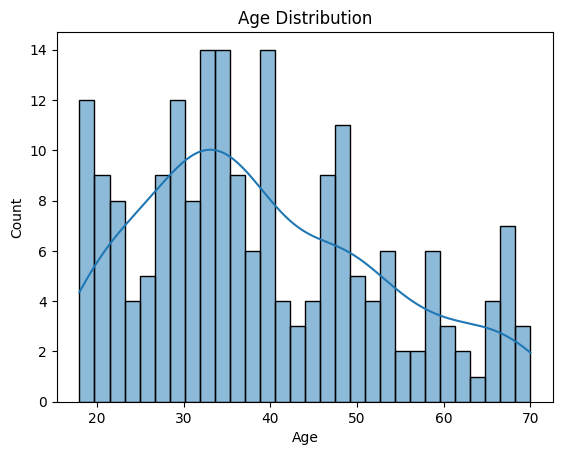

In [33]:
# import matplot, seaborn and plotly for good experience visuals
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age',bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

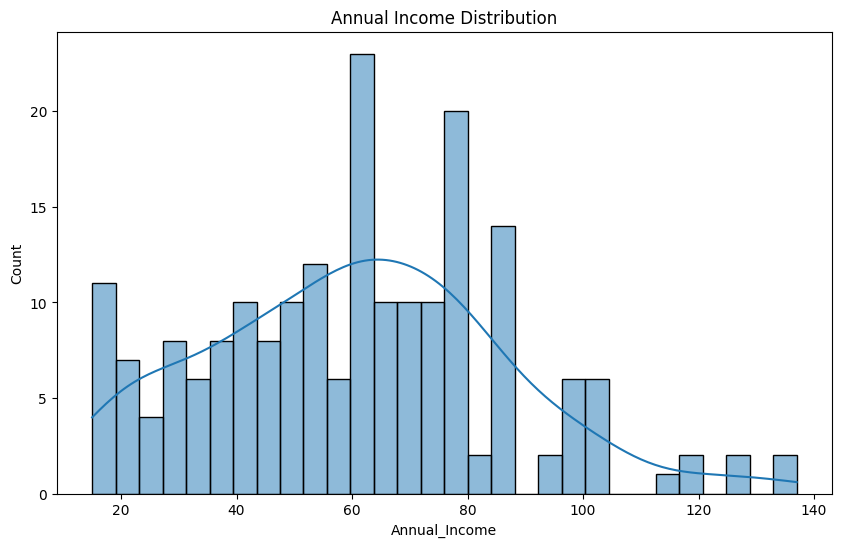

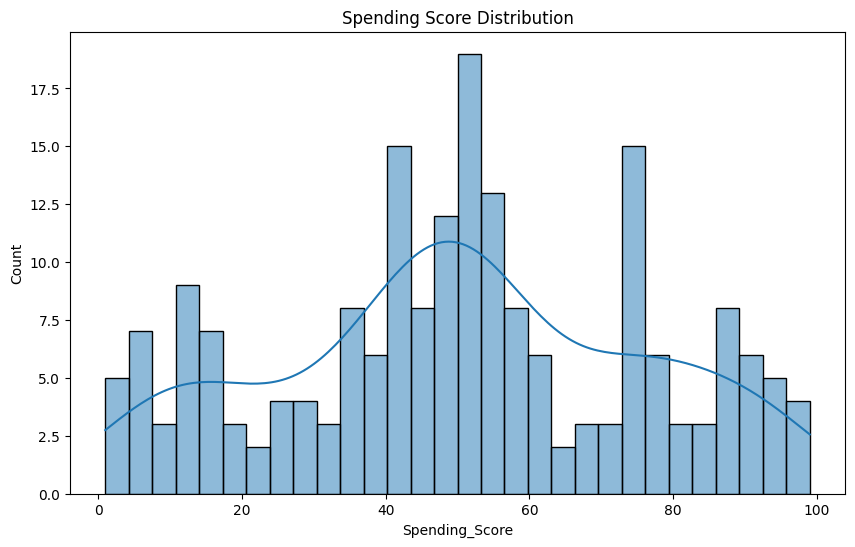

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending_Score'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

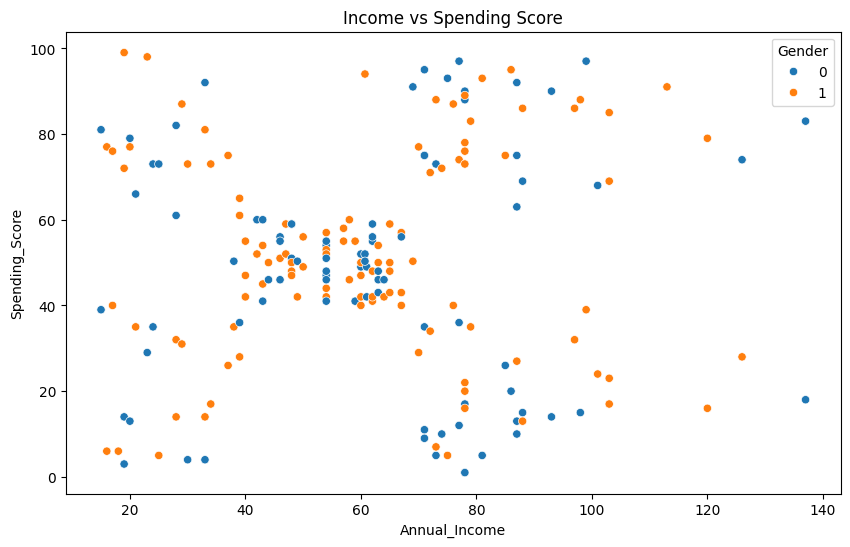

In [35]:
import plotly.express as px

fig = px.histogram(df, x='Annual_Income', y='Spending_Score', color='Gender', nbins=30, title="Whole data Visual")
fig.update_layout(
    title_x=0.5,
    yaxis_title = 'Spending Score',
    template = 'plotly_dark'
    )
fig.show()


#visula in "Scatter plot"
# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

f = px.pie(df, names='Gender', title='Gender Distribution')
f.show()

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



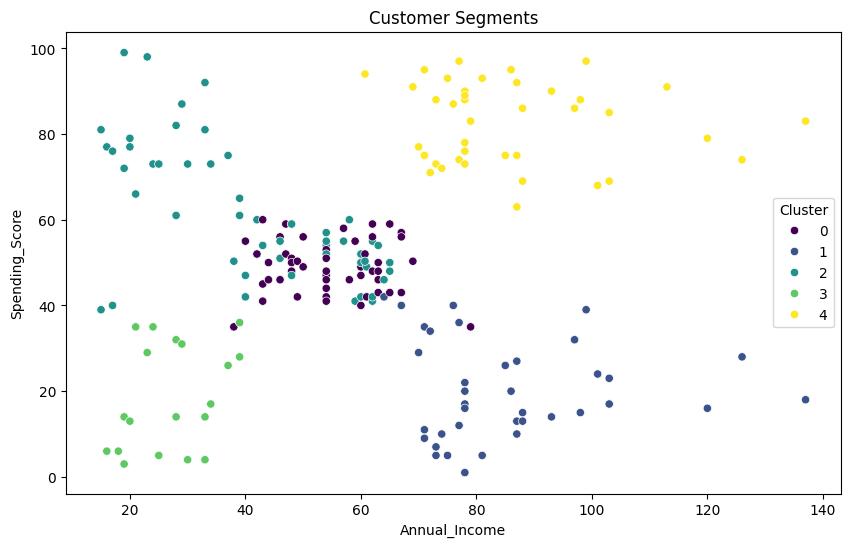

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual_Income', 'Spending_Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()